# House Price Prediction


This dataset is used in the Kaggle competition: [**House Prices - Advanced Regression Techniques**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

![](img/kaggle_5407_media_housesbanner.png)

It is based on the **Ames Housing Dataset**, compiled by **Dean De Cock**, offering a rich and modern alternative to the classic Boston Housing dataset. The data contains detailed information on homes sold in **Ames, Iowa**, including structural, locational, and quality-related attributes.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [109]:

# load data sets 
# train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


### Exploring imported dataset

In [110]:

# sneak peek of the train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The datasets contain a large number of features , with a mix of numerical and categorical columns.

The 'SalePrice' column is present only in the train set (target variable).
The train set has 1460 rows, while the test set has 1459 rows. 

In [4]:
# shape of the datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


we have 81 features in the train set so lets explore different feature selection methods. The train set have other features except sales price.

In [5]:
# Check for duplicate IDs
print("Duplicate IDs:", train.duplicated('Id').sum())

# Drop the 'Id' column (not useful for modeling)
train.drop('Id', axis=1, inplace=True)


Duplicate IDs: 0


The dataset dont have duplicate rows.

In [6]:
# columns in the datasets
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## EDA

### Personal Feature Selection & Understanding

Before building any models, it's important to carefully explore the **data description file** provided with the dataset. With 81 available features, not all will be equally useful in predicting the target variable, `SalePrice`.

Some features may contain redundant or low-value information. Selecting a focused subset based on domain intuition and initial exploration helps reduce noise and improve model effectiveness.

---

### Key Features 

| Feature         | Description                                       |
|-----------------|---------------------------------------------------|
| `OverallQual`   | Overall material and finish quality               |
| `YearBuilt`     | Original construction year                        |
| `TotalBsmtSF`   | Total square feet of basement area                |
| `GrLivArea`     | Above ground living area in square feet           |
| `TotRmsAbvGrd`  | Total number of rooms above ground (excluding bathrooms) |

 

This selected subset provides a strong foundation for baseline modeling, focusing on variables that describe the **quality, size, and space** of the home. These features will be further explored through visualization and correlation analysis in the next steps.


### looking at SalePrice

In [7]:
# let's see stats of SalePrice
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Initial Observations

- The **mean** is around **180,921**, while the **median** (50%) is **163,000** — indicating **right (positive) skewness**.
- **75% of the data** lies below **214,000**, yet the **maximum** value shoots up to **755,000** — suggesting the presence of **outliers**.
- The **standard deviation** is also relatively high, which can happen if prices are spread out unevenly.

Even without visualizing the distribution, the difference between the mean and median — and the long tail between the 75th percentile and max — clearly hints at skewness in the `SalePrice` distribution.


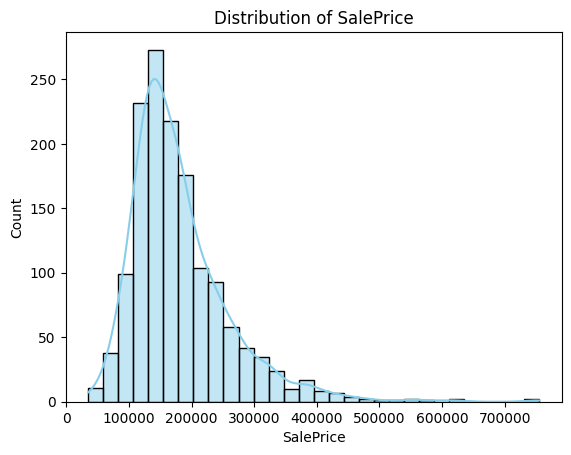

In [9]:
# now let's visualize the distribution of SalePrice
sns.histplot(train["SalePrice"].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribution of SalePrice")
plt.show()


And yes we find 

* Deviate from the normal distribution.
* Have appreciable positive skewness 

Let's look at how skewed the data is.

In [10]:
# Check for skewness and kurtosis
print(f"Skewness: {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


The SalePrice data is positively skewed (right-skewed) and not normally distributed. So we can consider transformations to reduce skewness before modeling.

###  Relationship between selected features


**Relation with numerical variables**

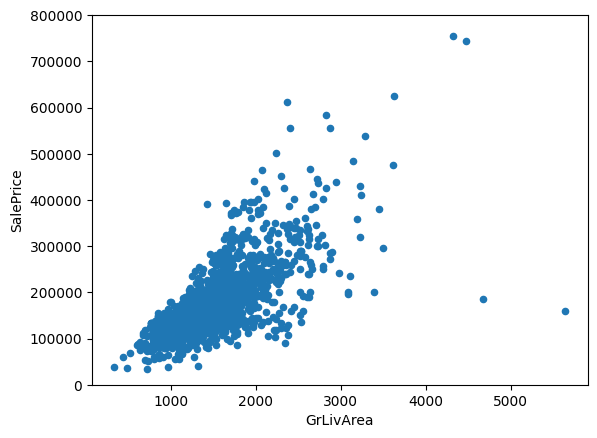

In [11]:
#scatter plot with GrLivArea 
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

We can see that there is a linear relationship between Sale Price and Ground Living Area (GrLivArea).

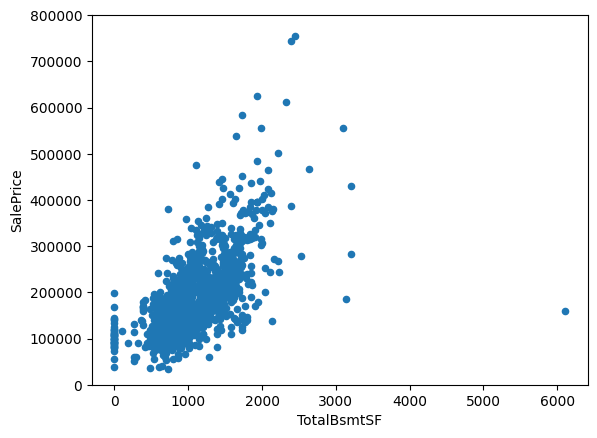

In [72]:
#scatter plot with TotalBsmtSF 
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

There appears to be a slight exponential relationship between Sale Price and Total Basement Square Footage (TotalBsmtSF).

**Relation with categorical variables**

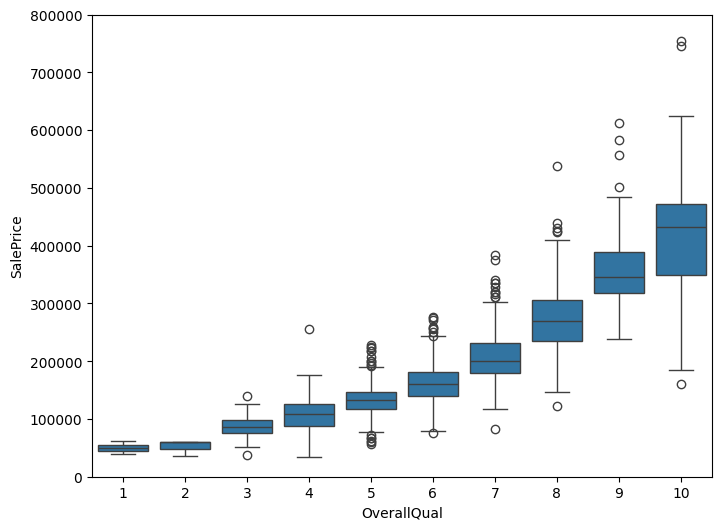

In [12]:
# box plot of SalePrice vs OverallQual
plt.figure(figsize=(8, 6))
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
sns.boxplot(x='OverallQual', y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

The box plot confirms that higher the price for the higher quality house.



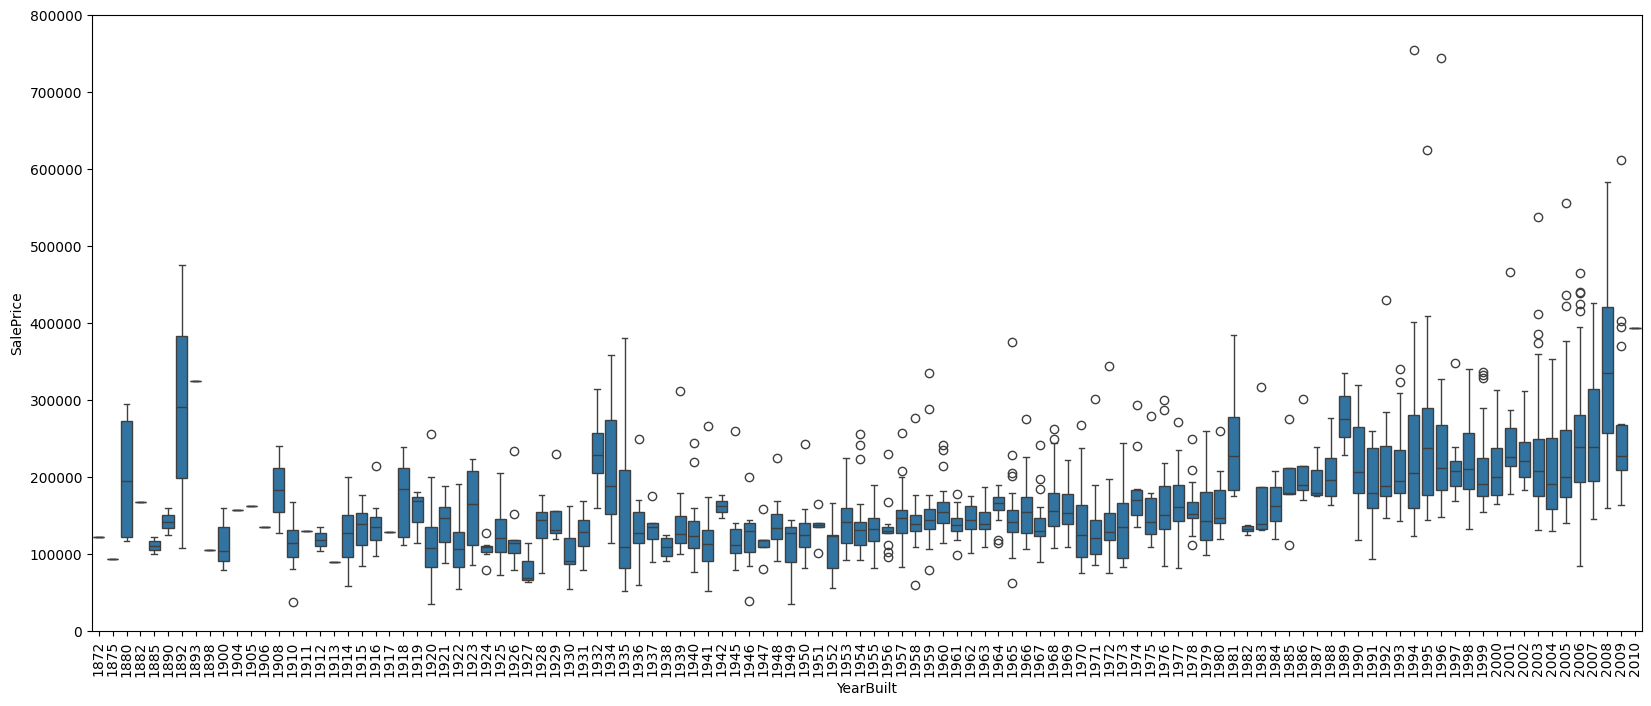

In [13]:
# box plot with YearBuilt
plt.figure(figsize=(20, 8))
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

Though we can not quantify this , but more recently built houses will have a high price.



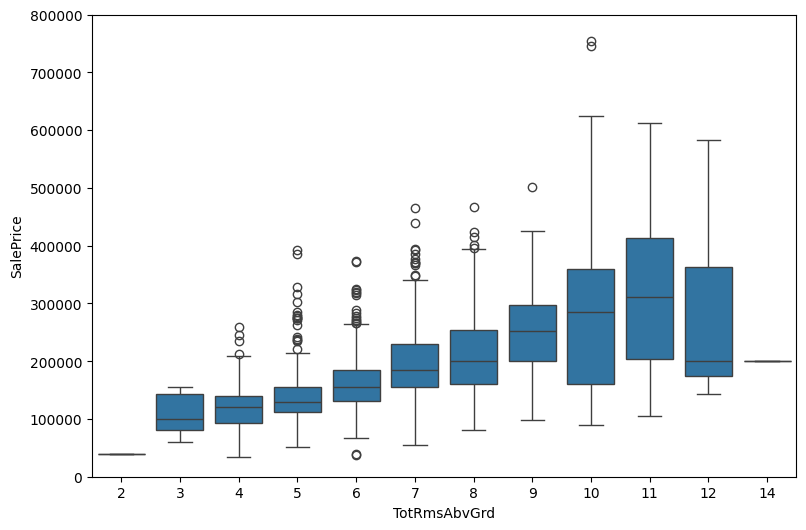

In [14]:
# box plot with TotRmsAbvGrd
plt.figure(figsize=(20, 6))
var = 'TotRmsAbvGrd'
plt.subplot(1, 2, 1)
data = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.boxplot(x=var, y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

It's natural the more room the house has the higher the price.



### Summary of Relationships with SalePrice

- **GrLivArea** and **TotalBsmtSF** appear to have a **positive linear relationship** with `SalePrice`. As either of these areas increases, the sale price tends to increase accordingly.

- **OverallQual**, **TotRmsAbvGrd**, and **YearBuilt** also show a relationship with `SalePrice`:
  - **OverallQual** has the **strongest relationship**, with box plots clearly showing higher sale prices for homes with higher overall quality ratings.
  - **TotRmsAbvGrd** shows a similar trend, though the relationship is **weaker** compared to OverallQual.
  - **YearBuilt** suggests that newer homes generally sell for more, indicating a **positive association** with sale price.


### Other variables
So far we only took the variables that we subjectively chose and made performed analysis about them, but it's the best approach, we need to look at the available data subjectively.

#### Correlation matrix Heatmap


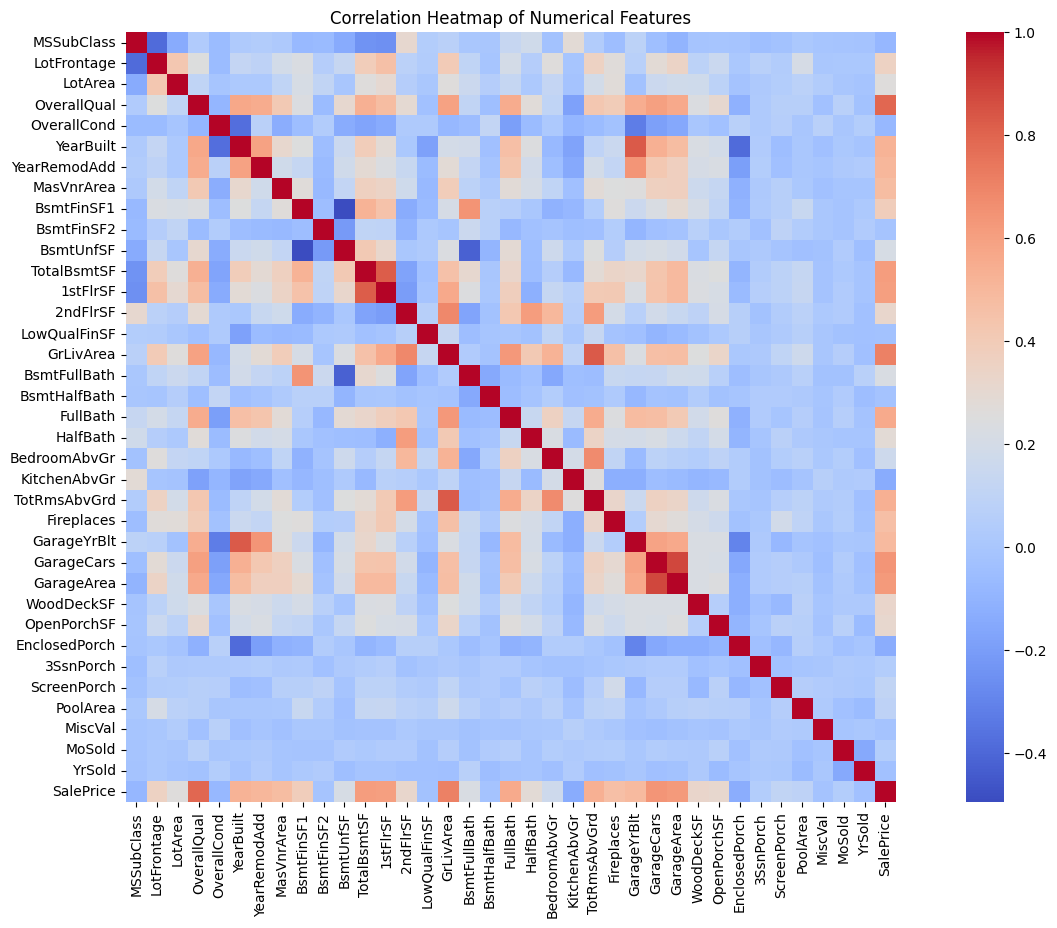

In [18]:

numeric_df = train.select_dtypes(include='number')
corrmat = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f',
            cmap='coolwarm', annot=False, annot_kws={'size': 8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

At first sight, there are two red colored squares that get my attention. The first one refers to the TotalBsmtSF and 1stFlrSF variables, and the second one refers to the GarageX variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that the 'SalePrice' correlations. We can see our well-known GrLivArea, TotalBsmtSF, and OverallQual having high correlation, but we can also see many other variables that should be taken into account. That's what we will do next.

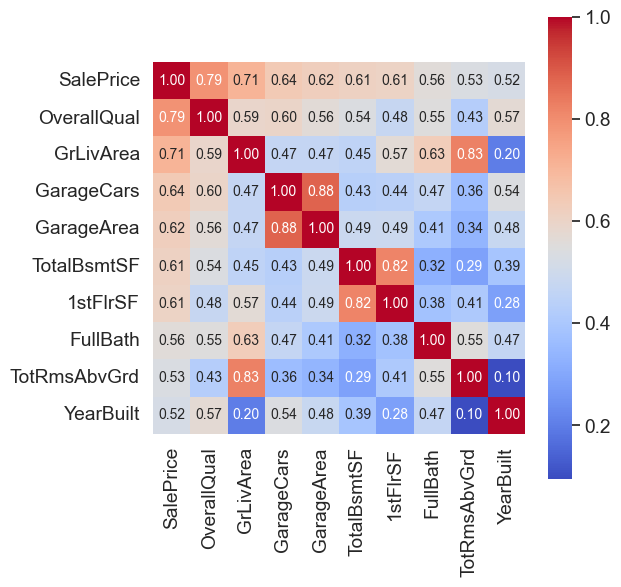

In [22]:
plt.figure(figsize=(6, 6))

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='coolwarm',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Feature Correlation Insights

- **OverallQual**, **GrLivArea**, and **TotalBsmtSF** are **strongly correlated** with `SalePrice`, making them important predictors in our model.

- **TotRmsAbvGrd** and **GrLivArea** are also highly correlated with each other. Since **GrLivArea** has a stronger correlation with `SalePrice`, we can consider **dropping TotRmsAbvGrd** to avoid multicollinearity.

- **GarageCars** and **GarageArea** are almost identical in meaning — the number of cars a garage fits is naturally determined by its size. Since both are strongly correlated with `SalePrice`, but **GarageCars** slightly more so, we’ll keep **GarageCars** and drop **GarageArea**.

- Similarly, **TotalBsmtSF** and **1stFlrSF** appear to be "twin features." For simplicity, we’ll keep **TotalBsmtSF**, reinforcing our original assumption that it captures basement size adequately.

- **FullBath** behaves as expected, showing a moderate positive relationship with `SalePrice`.

- **YearBuilt** shows a mild positive correlation with `SalePrice`. While not dominant, it may reflect buyer preference for newer homes. This suggests a potential for **time-series** — something worth exploring in more depth in future work.

So, dropping highly correlated features can help reduce multicollinearity and simplify the regression model without sacrificing much predictive power.


In [23]:
numerical_features = train.select_dtypes('number').columns.to_list()
numerical_features.pop(0)
print(f"Number of numerical features: {len(numerical_features)}")

# although numerical there are features which reprsent years
# there are some dicrete numerical features too.
# we need to remove them from the list.


year_features = [feature for feature in numerical_features 
                 if 'Yr' in feature or 'Year' in feature]
print(f"Number of Temporal features: {len(year_features)}")


discrete_features = [feature for feature in numerical_features 
                     if train[feature].nunique()<= 15 and feature not in year_features]
print(f"Number of discrete numerical features: {len(discrete_features)}")

continuous_num_features = [feature for feature in numerical_features 
                     if feature not in discrete_features + year_features] 
                                               
print(f"Number of continuous numerical features: {len(continuous_num_features)}")

Number of numerical features: 36
Number of Temporal features: 4
Number of discrete numerical features: 13
Number of continuous numerical features: 19


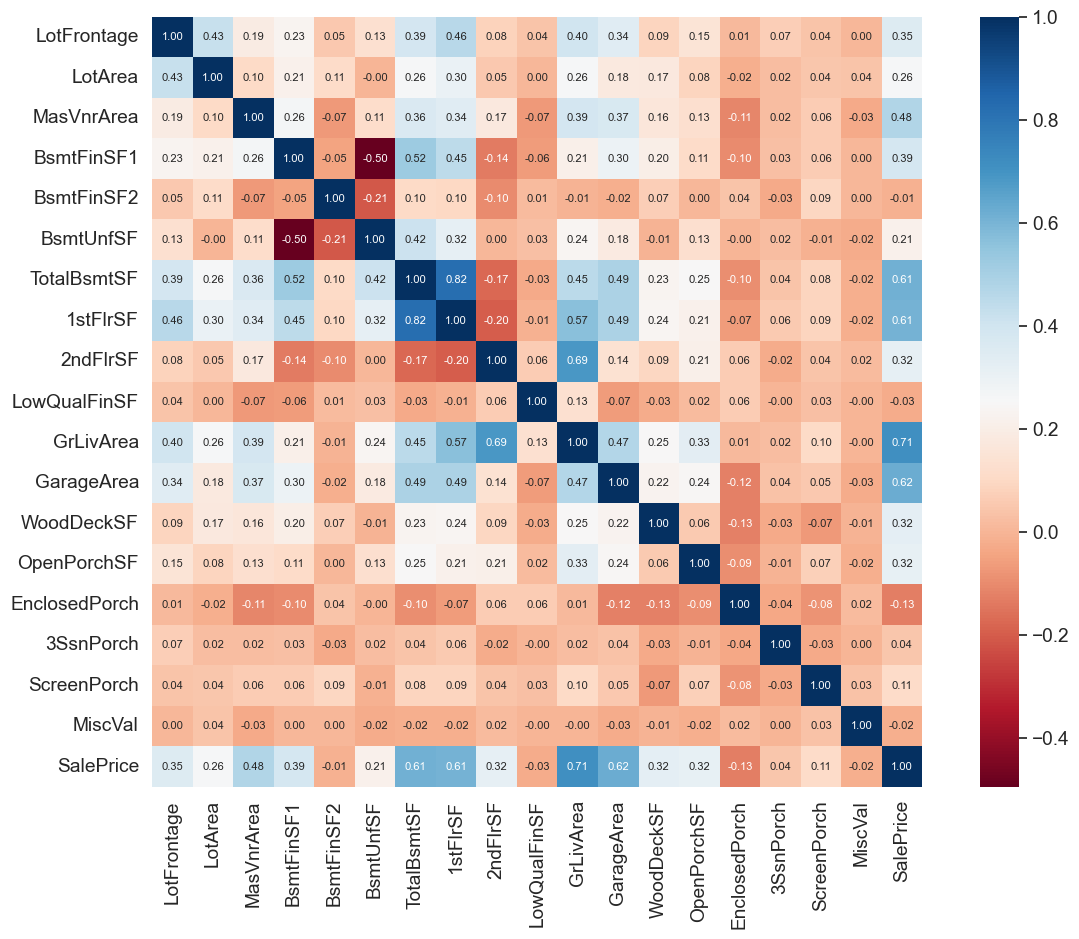

In [24]:
plt.figure(figsize=(15, 10))
corrmat = train[continuous_num_features].corr()
sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f', 
            annot=True, cmap='RdBu', annot_kws={'size': 8});

Some of the continuous numerical features seem to be correlated with each other though not as strongly. Though some new correlation are noticeable we still reach the same conclusions as above



### SalePrice scatter plot with highly correlated features


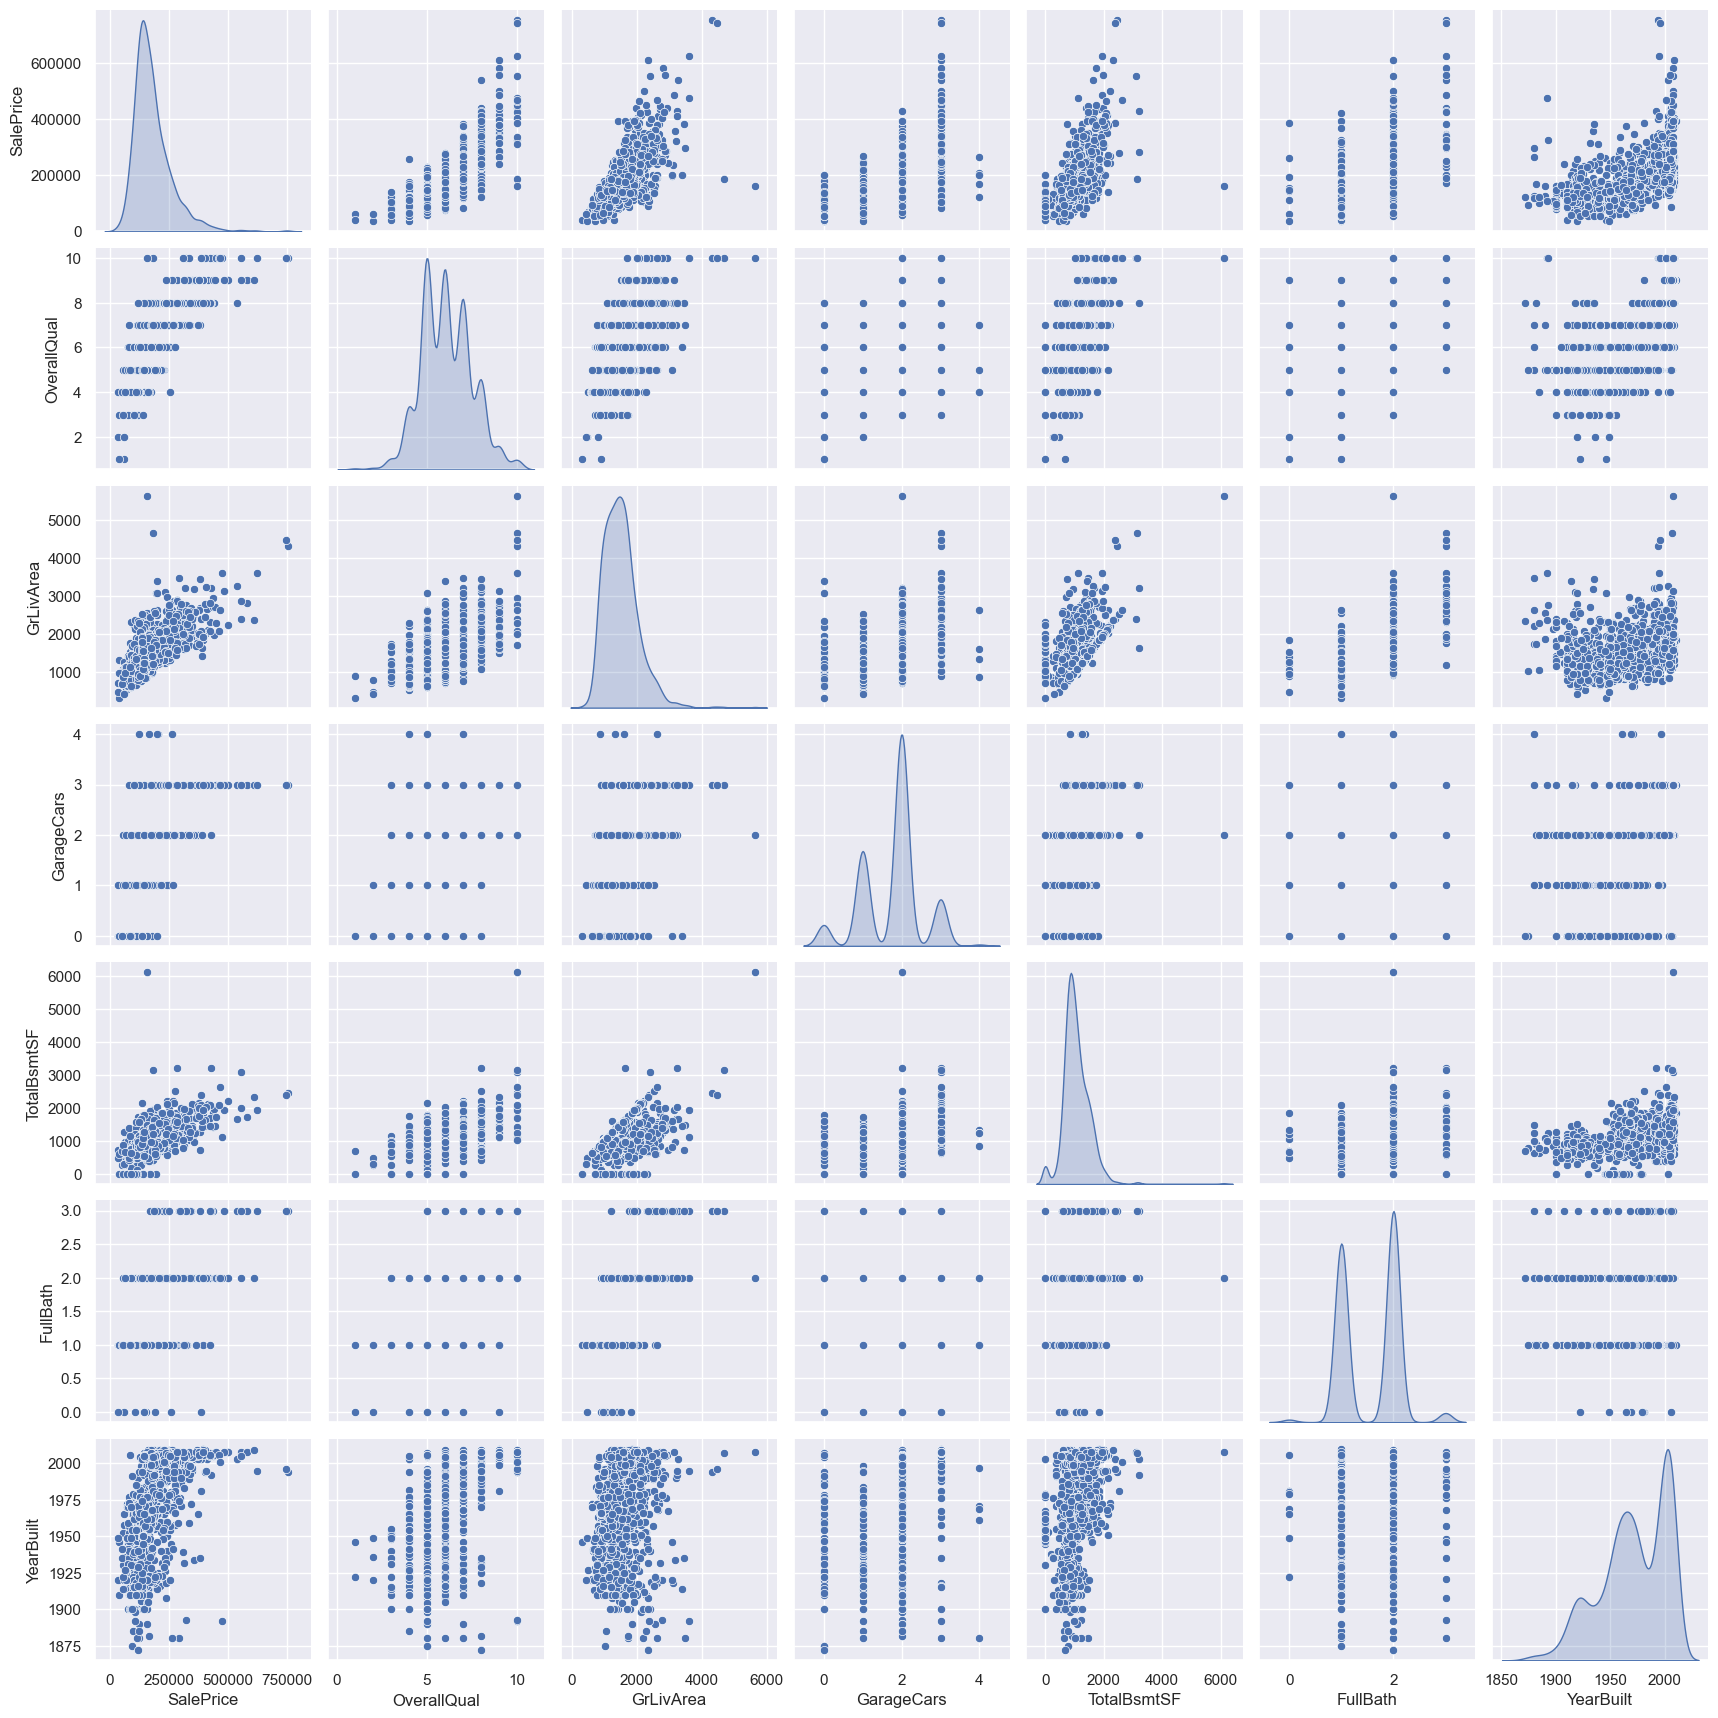

In [27]:
# scatterplot 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height= 2.5, diag_kind='kde')
plt.show()

Although we already know the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.



 
## Handling Missing Data

In the dataset some column have missing value as there can be some features no existed, so we have to handel this carefully.

In [31]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[total>0])


              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685


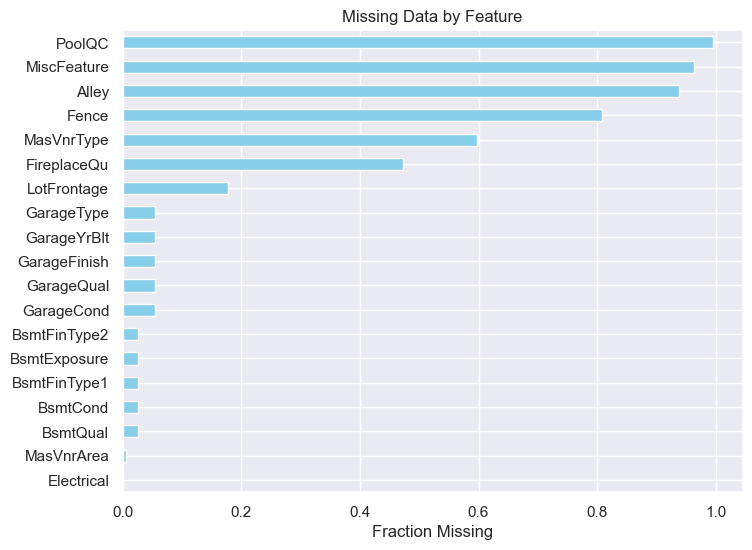

In [30]:
# Visualize missing data
plt.figure(figsize=(10, 6))
missing = train.isnull().mean()
missing = missing[missing > 0].sort_values()
missing.plot.barh(figsize=(8,6), color='skyblue')
plt.xlabel('Fraction Missing')
plt.title('Missing Data by Feature')
plt.show()


We'll consider that when **more than 15% of data is missing**, the corresponding variable should be **deleted entirely** , no imputation to fill missing values will be made. According to this variables such as `'PoolQC'`, `'MiscFeature'`, `'Alley'`, and others should be removed.
 None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house

In [32]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    missing_count = train[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")


GarageType: 81 missing values
GarageFinish: 81 missing values
GarageQual: 81 missing values
GarageCond: 81 missing values


In [34]:
train[train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


The GarageX variables have the same number of missing data.
We can simply fill the variables with No garage. 

In [36]:
train[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


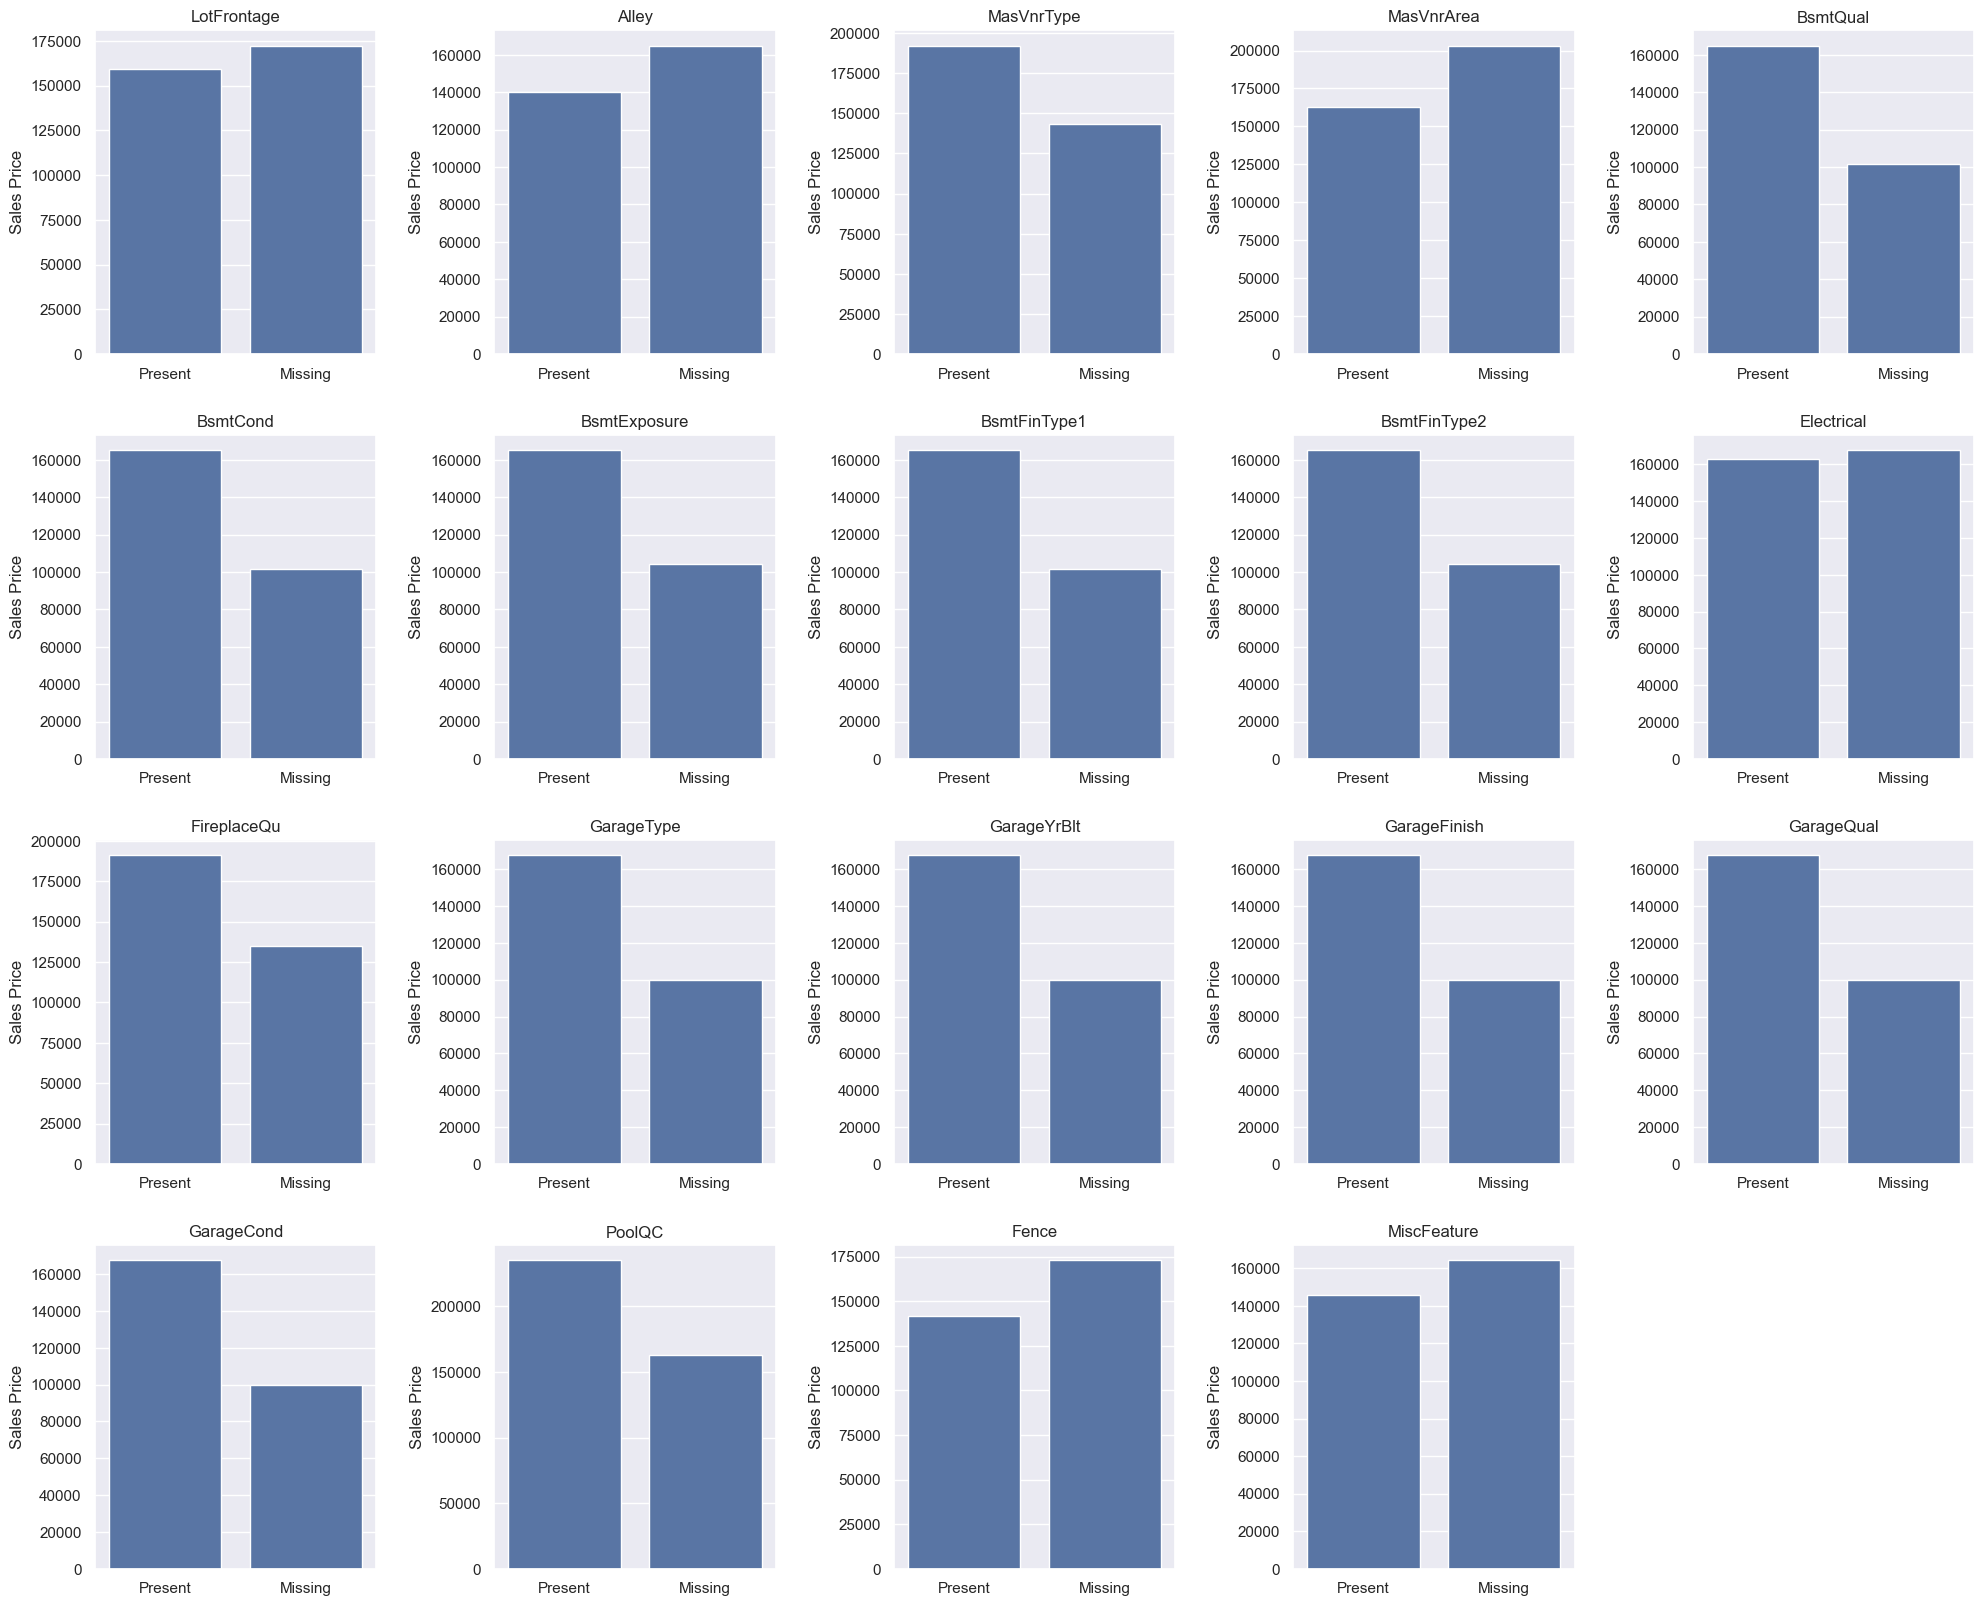

In [38]:
# Let's visualize the features with missing values and their impact on SalePrice
features_with_na = [features for features in train.columns if train[features].isnull().sum() >= 1]

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_with_na, 1):
    plt.subplot(5, 5, i)
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.xticks([0, 1], ["Present", "Missing"])
    plt.ylabel("Sales Price", rotation=90)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

### Observations
We can see that for some features when the value is NA, the median value for that set of columns is higher than when values are available.
So it is safe to assume that the missing values need to be replaced with some meaningful values.

## Handling Outliers

### Univariate analysis 


The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data.  


In [42]:
# checking for outliers in SalePrice
from sklearn.preprocessing import StandardScaler

saleprice = train['SalePrice'].values.reshape(-1, 1)
saleprice_scaled = StandardScaler().fit_transform(saleprice)

low_range = saleprice_scaled[np.argsort(saleprice_scaled[:, 0])[:10]]
high_range = saleprice_scaled[np.argsort(saleprice_scaled[:, 0])[-10:]]

print("Outer range (low) of the distribution:")
print(low_range)

print("\nOuter range (high) of the distribution:")
print(high_range)


Outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

Outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


we can see that
- Low range values are similar and not too far from 0.  
- High range values are far from 0, and the 7 .
- For now, we'll not consider any of these values as outliers, but we should be careful with those two 7.something values.


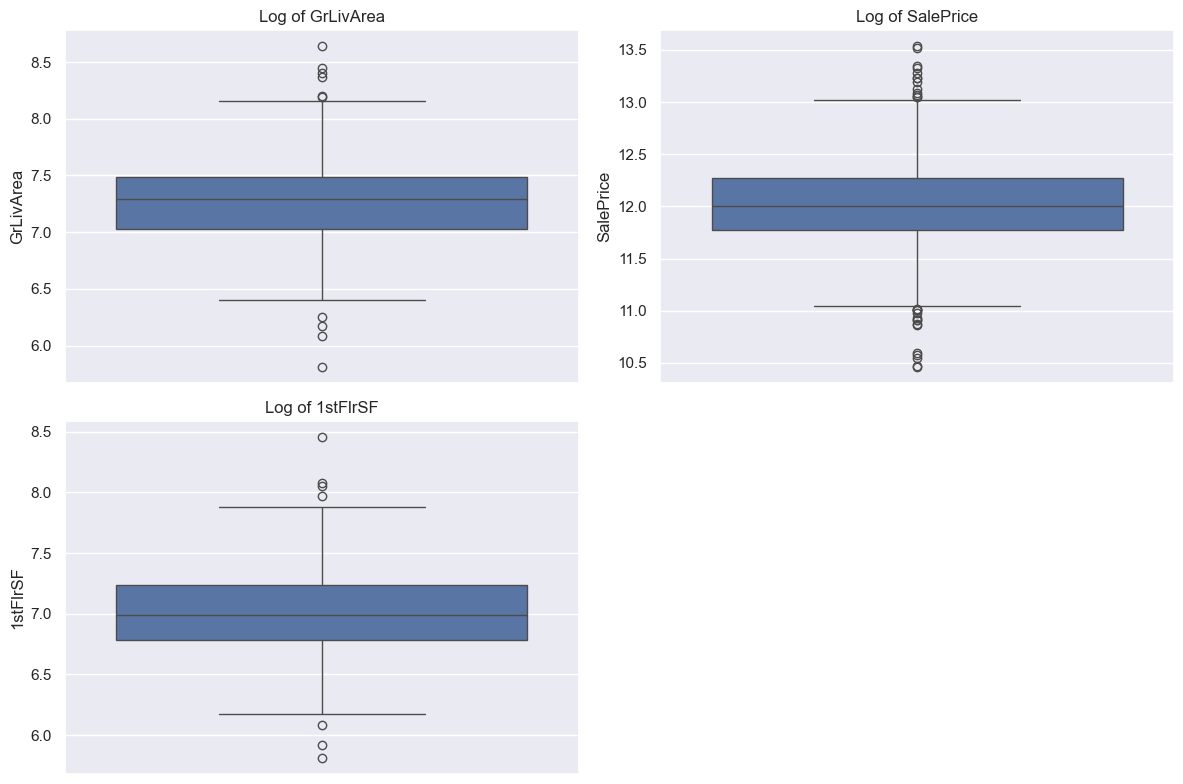

In [45]:
 
# some continuous numeric features
continuous_num_features = ['GrLivArea', 'TotalBsmtSF', 'SalePrice', '1stFlrSF']

plt.figure(figsize=(12, 8))

plot_num = 1
for feature in continuous_num_features:
    data_col = train[feature]
    if (data_col <= 0).any():  # skip if zeros or negatives
        continue
    data_log = np.log(data_col)

    plt.subplot(2, 2, plot_num)  
    sns.boxplot(y=data_log)
    plt.title(f'Log of {feature}')
    plot_num += 1

plt.tight_layout()
plt.show()


There are plenty of outliers present even after log transformation in every feature.  


### Bivariate analysis

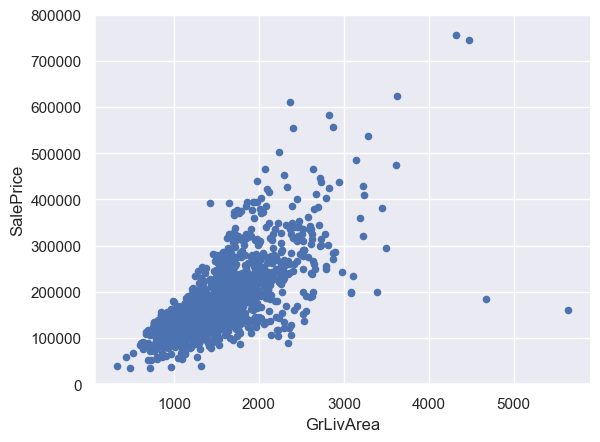

In [46]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can see at the bottom right two with extremely large GrLivArea that are of a low price. this two values with very large 'GrLivArea' appear unusual and do not follow the general trend.  
These values are huge oultliers. Therefore, we can safely delete them.

In [58]:
# Deleting outlier points with very large 'GrLivArea'
train.sort_values(by='GrLivArea', ascending=False).head(2)

train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

<Figure size 800x600 with 0 Axes>

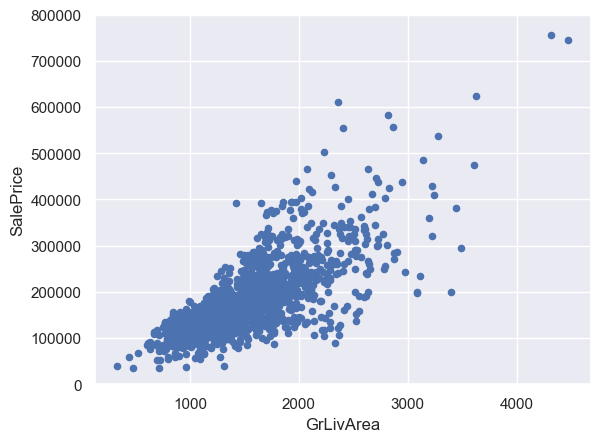

In [61]:
# scatter plot with GrLivArea after removing outliers
plt.figure(figsize=(8, 6))  
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()

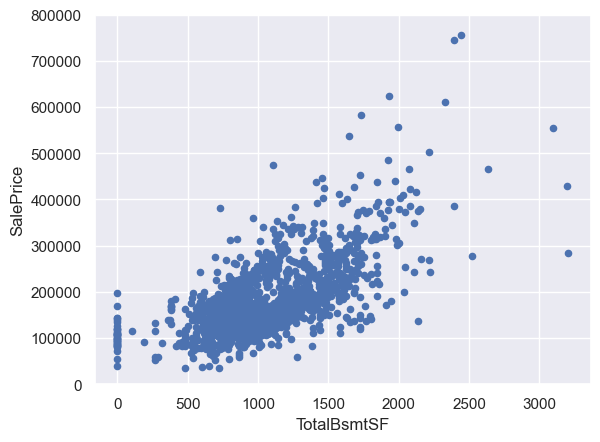

In [62]:
#scatterplot with grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Some values like `TotalBsmtSF` over 3000 look big, but it’s okay to keep them. We won’t remove anything.


## Checking Assumptions

We already check for linear relationship. Now checking normality assumption.

### Normality

C:\Users\COM\AppData\Local\Temp\ipykernel_14620\2775471031.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm);


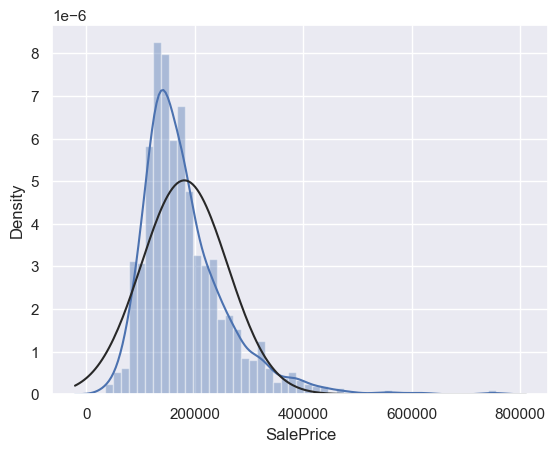

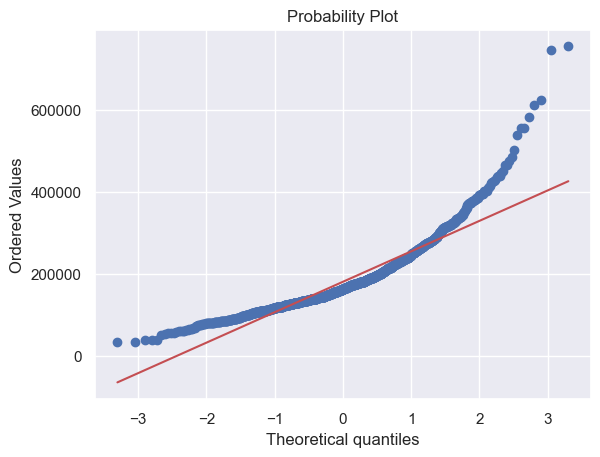

In [68]:
from scipy.stats import norm, probplot

#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt)

'SalePrice' is not normally distributed. It has a peak, is skewed to the right, and doesn’t follow the straight line in the Q-Q plot.

Transformation needed to fix this. The same goes for 'GrLivArea'.


In [69]:
#applying log transformation
train_log = train.copy()

# Log-transform the target variable
train_log['SalePrice'] = np.log1p(train_log['SalePrice']) 

C:\Users\COM\AppData\Local\Temp\ipykernel_14620\3882187753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_log['SalePrice'], fit=norm)


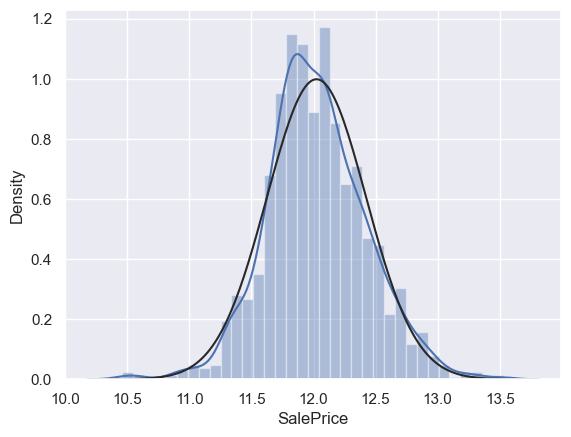

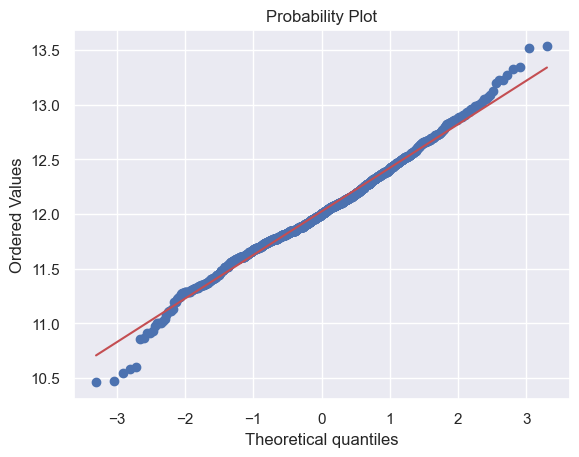

In [71]:
#transformed histogram and normal probability plot
sns.distplot(train_log['SalePrice'], fit=norm)
fig = plt.figure()
res = probplot(train_log['SalePrice'], plot=plt)

Now its better slight deviations from normality are acceptable.

 

In [75]:
# Check for normality using Shapiro-Wilk test
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# Shapiro-Wilk test
stat, p = shapiro(train_log['SalePrice'])
print(f'Shapiro-Wilk Test statistic={stat:.4f}, p-value={p:.4f}')

if p > 0.01:
    print("Log SalePrice looks normally distributed (fail to reject H0)")
else:
    print("Log SalePrice does NOT look normally distributed (reject H0)") 


Shapiro-Wilk Test statistic=0.9912, p-value=0.0000
Log SalePrice does NOT look normally distributed (reject H0)


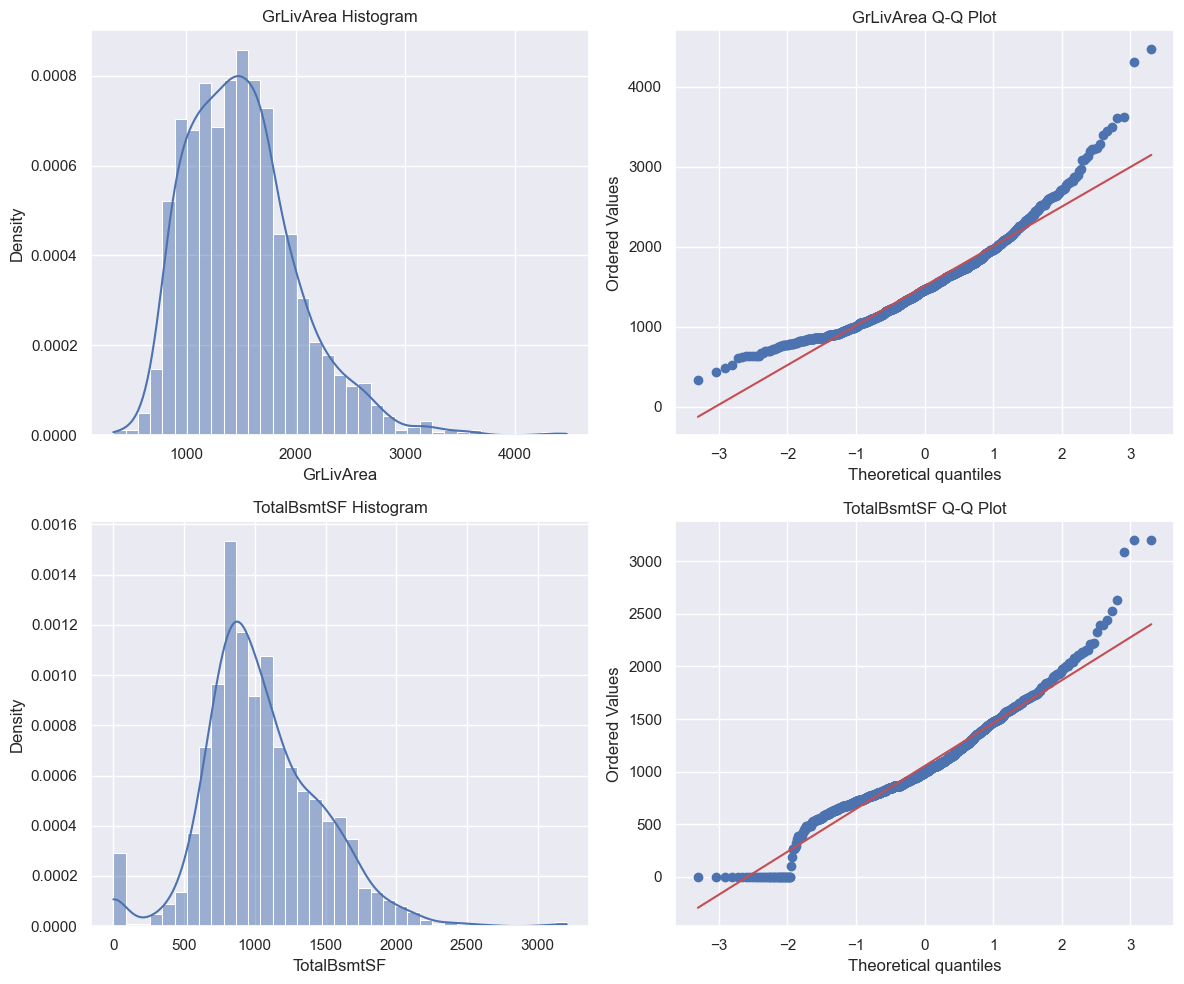

In [76]:
plt.figure(figsize=(12, 10))

# GrLivArea Histogram
plt.subplot(2, 2, 1)
sns.histplot(train['GrLivArea'], kde=True, stat="density")
plt.title('GrLivArea Histogram')

# GrLivArea Q-Q Plot
plt.subplot(2, 2, 2)
probplot(train['GrLivArea'], plot=plt)
plt.title('GrLivArea Q-Q Plot')

# TotalBsmtSF Histogram
plt.subplot(2, 2, 3)
sns.histplot(train['TotalBsmtSF'], kde=True, stat="density")
plt.title('TotalBsmtSF Histogram')

# TotalBsmtSF Q-Q Plot
plt.subplot(2, 2, 4)
probplot(train['TotalBsmtSF'], plot=plt)
plt.title('TotalBsmtSF Q-Q Plot')

plt.tight_layout()
plt.show()


#### Observations:

- We can clearly see **skewness** in the distribution.
- There are also **many zero values** in the **TotalBsmtSF**feature.
- A direct log transformation is **not suitable**, since `log(0)` is undefined.
- A better approach is to:
  - Create a **binary variable** indicating whether the basement exists (`1`) or not (`0`).
  - Apply the **log transformation only to non-zero values**.
- This method allows us to **retain the information** about the presence or absence of a basement, while also **normalizing** the non-zero part of the distribution.


c:\Users\COM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\COM\AppData\Local\Temp\ipykernel_14620\406602538.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.75227038 7.14045304 6.82437367 ... 7.04925484 6.98286275 7.13568735]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])


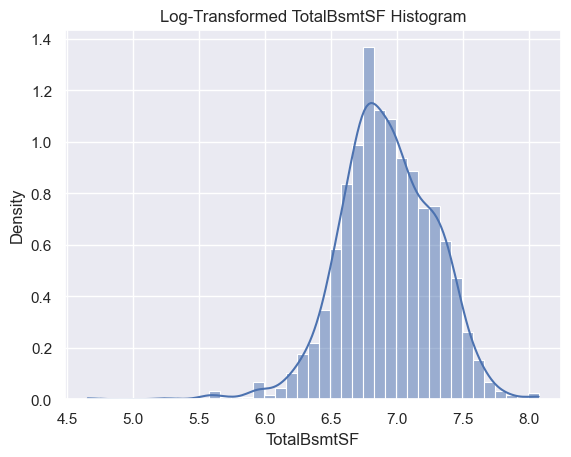

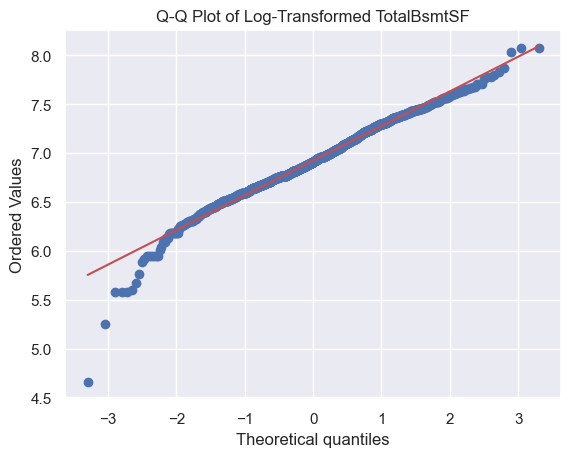

In [77]:
# Create a binary variable: 1 if basement exists, 0 otherwise
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

# Apply log transformation only where basement exists
train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

# Histogram and normal probability plot for transformed values
sns.histplot(train[train['HasBsmt'] == 1]['TotalBsmtSF'], kde=True, stat='density')
plt.title('Log-Transformed TotalBsmtSF Histogram')
plt.show()

# Q-Q plot
fig = plt.figure()
probplot(train[train['HasBsmt'] == 1]['TotalBsmtSF'], plot=plt)
plt.title('Q-Q Plot of Log-Transformed TotalBsmtSF')
plt.show()


In [79]:
train['OverallQual'].value_counts().sort_index()

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     16
Name: count, dtype: int64

In [ ]:
# Theoretical Multiple Linear Regression (MLR) Model:
# SalePrice = β0 + β1*OverallQual + β2*GrLivArea + β3*GarageCars + β4*TotalBsmtSF + ε

# Where:
# - SalePrice: Dependent variable (house price)
# - β0: Intercept
# - β1, β2, β3, β4: Coefficients for each predictor
# - OverallQual, GrLivArea, GarageCars, TotalBsmtSF: Independent variables
# - ε: Error term (residuals)

### homoscedasticity
The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side).

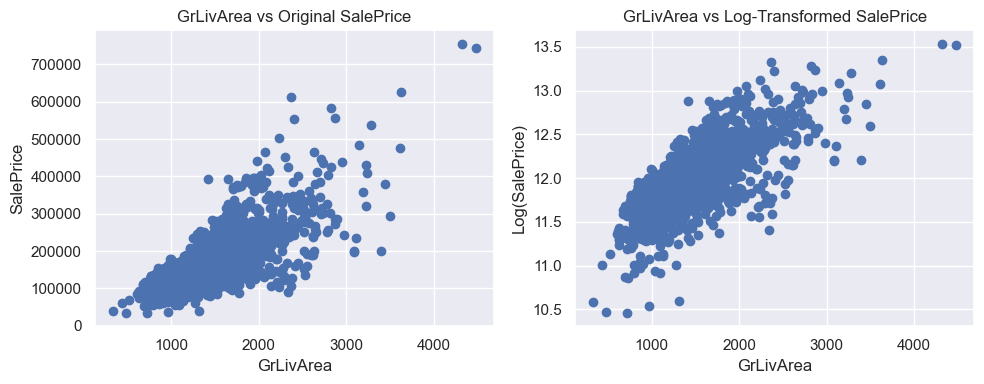

In [87]:
plt.figure(figsize=(10, 4))

# Plot 1: Original SalePrice
plt.subplot(1, 2, 1)
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title('GrLivArea vs Original SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Plot 2: Log-transformed SalePrice
plt.subplot(1, 2, 2)
plt.scatter(train['GrLivArea'], train_log['SalePrice'])
plt.title('GrLivArea vs Log-Transformed SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

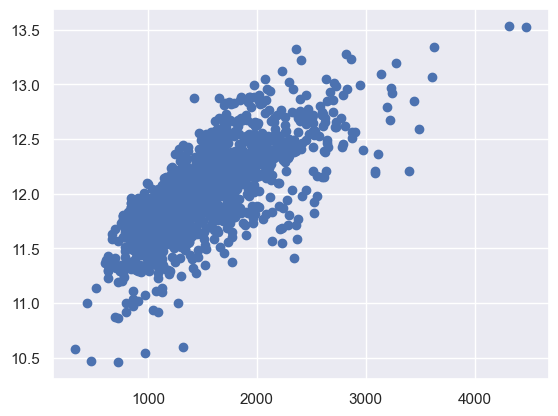

In [86]:
plt.scatter(train['GrLivArea'],train_log['SalePrice']);


The scatter plot doesn't show a conic shape , theres no heteroscedasticity problem

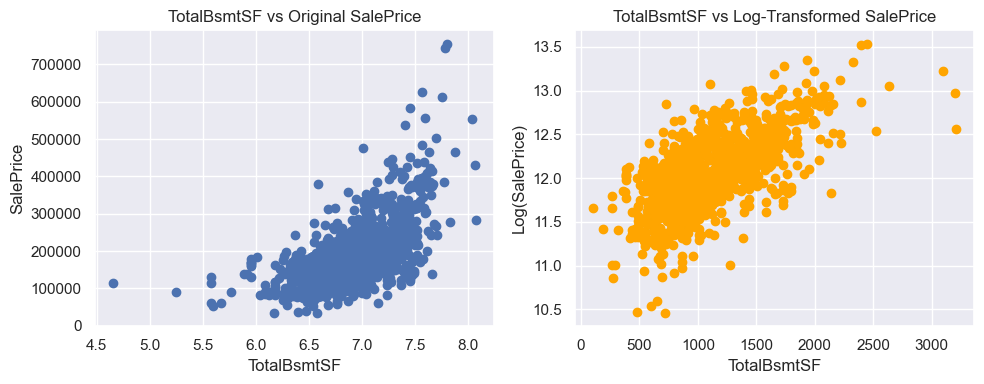

In [91]:
plt.figure(figsize=(10, 4))

# Filter: only where TotalBsmtSF > 0
train_filtered = train[train['TotalBsmtSF'] > 0]
train_log_filtered = train_log[train_log['TotalBsmtSF'] > 0]

# Plot 1: Original SalePrice
plt.subplot(1, 2, 1)
plt.scatter(train_filtered['TotalBsmtSF'], train_filtered['SalePrice'])
plt.title('TotalBsmtSF vs Original SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

# Plot 2: Log-transformed SalePrice
plt.subplot(1, 2, 2)
plt.scatter(train_log_filtered['TotalBsmtSF'], train_log_filtered['SalePrice'], color='orange')
plt.title('TotalBsmtSF vs Log-Transformed SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

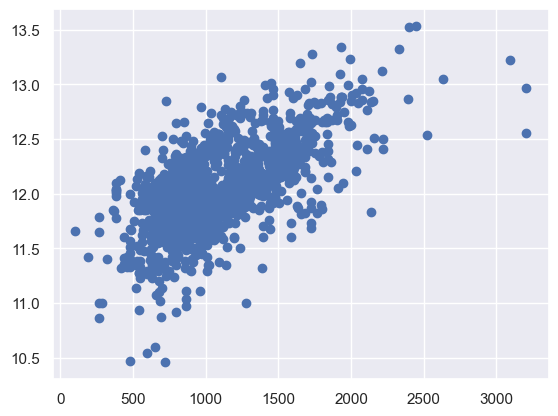

In [92]:
#scatter plot
plt.scatter(train_log[train_log['TotalBsmtSF']>0]['TotalBsmtSF'], train_log[train_log['TotalBsmtSF']>0]['SalePrice']);

Similarly we can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'.



### Discrete numerical values
now lets see the discrete variables

In [93]:
discrete_features

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [94]:
train[discrete_features].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


Exploring relationship between discrete features and SalePrice



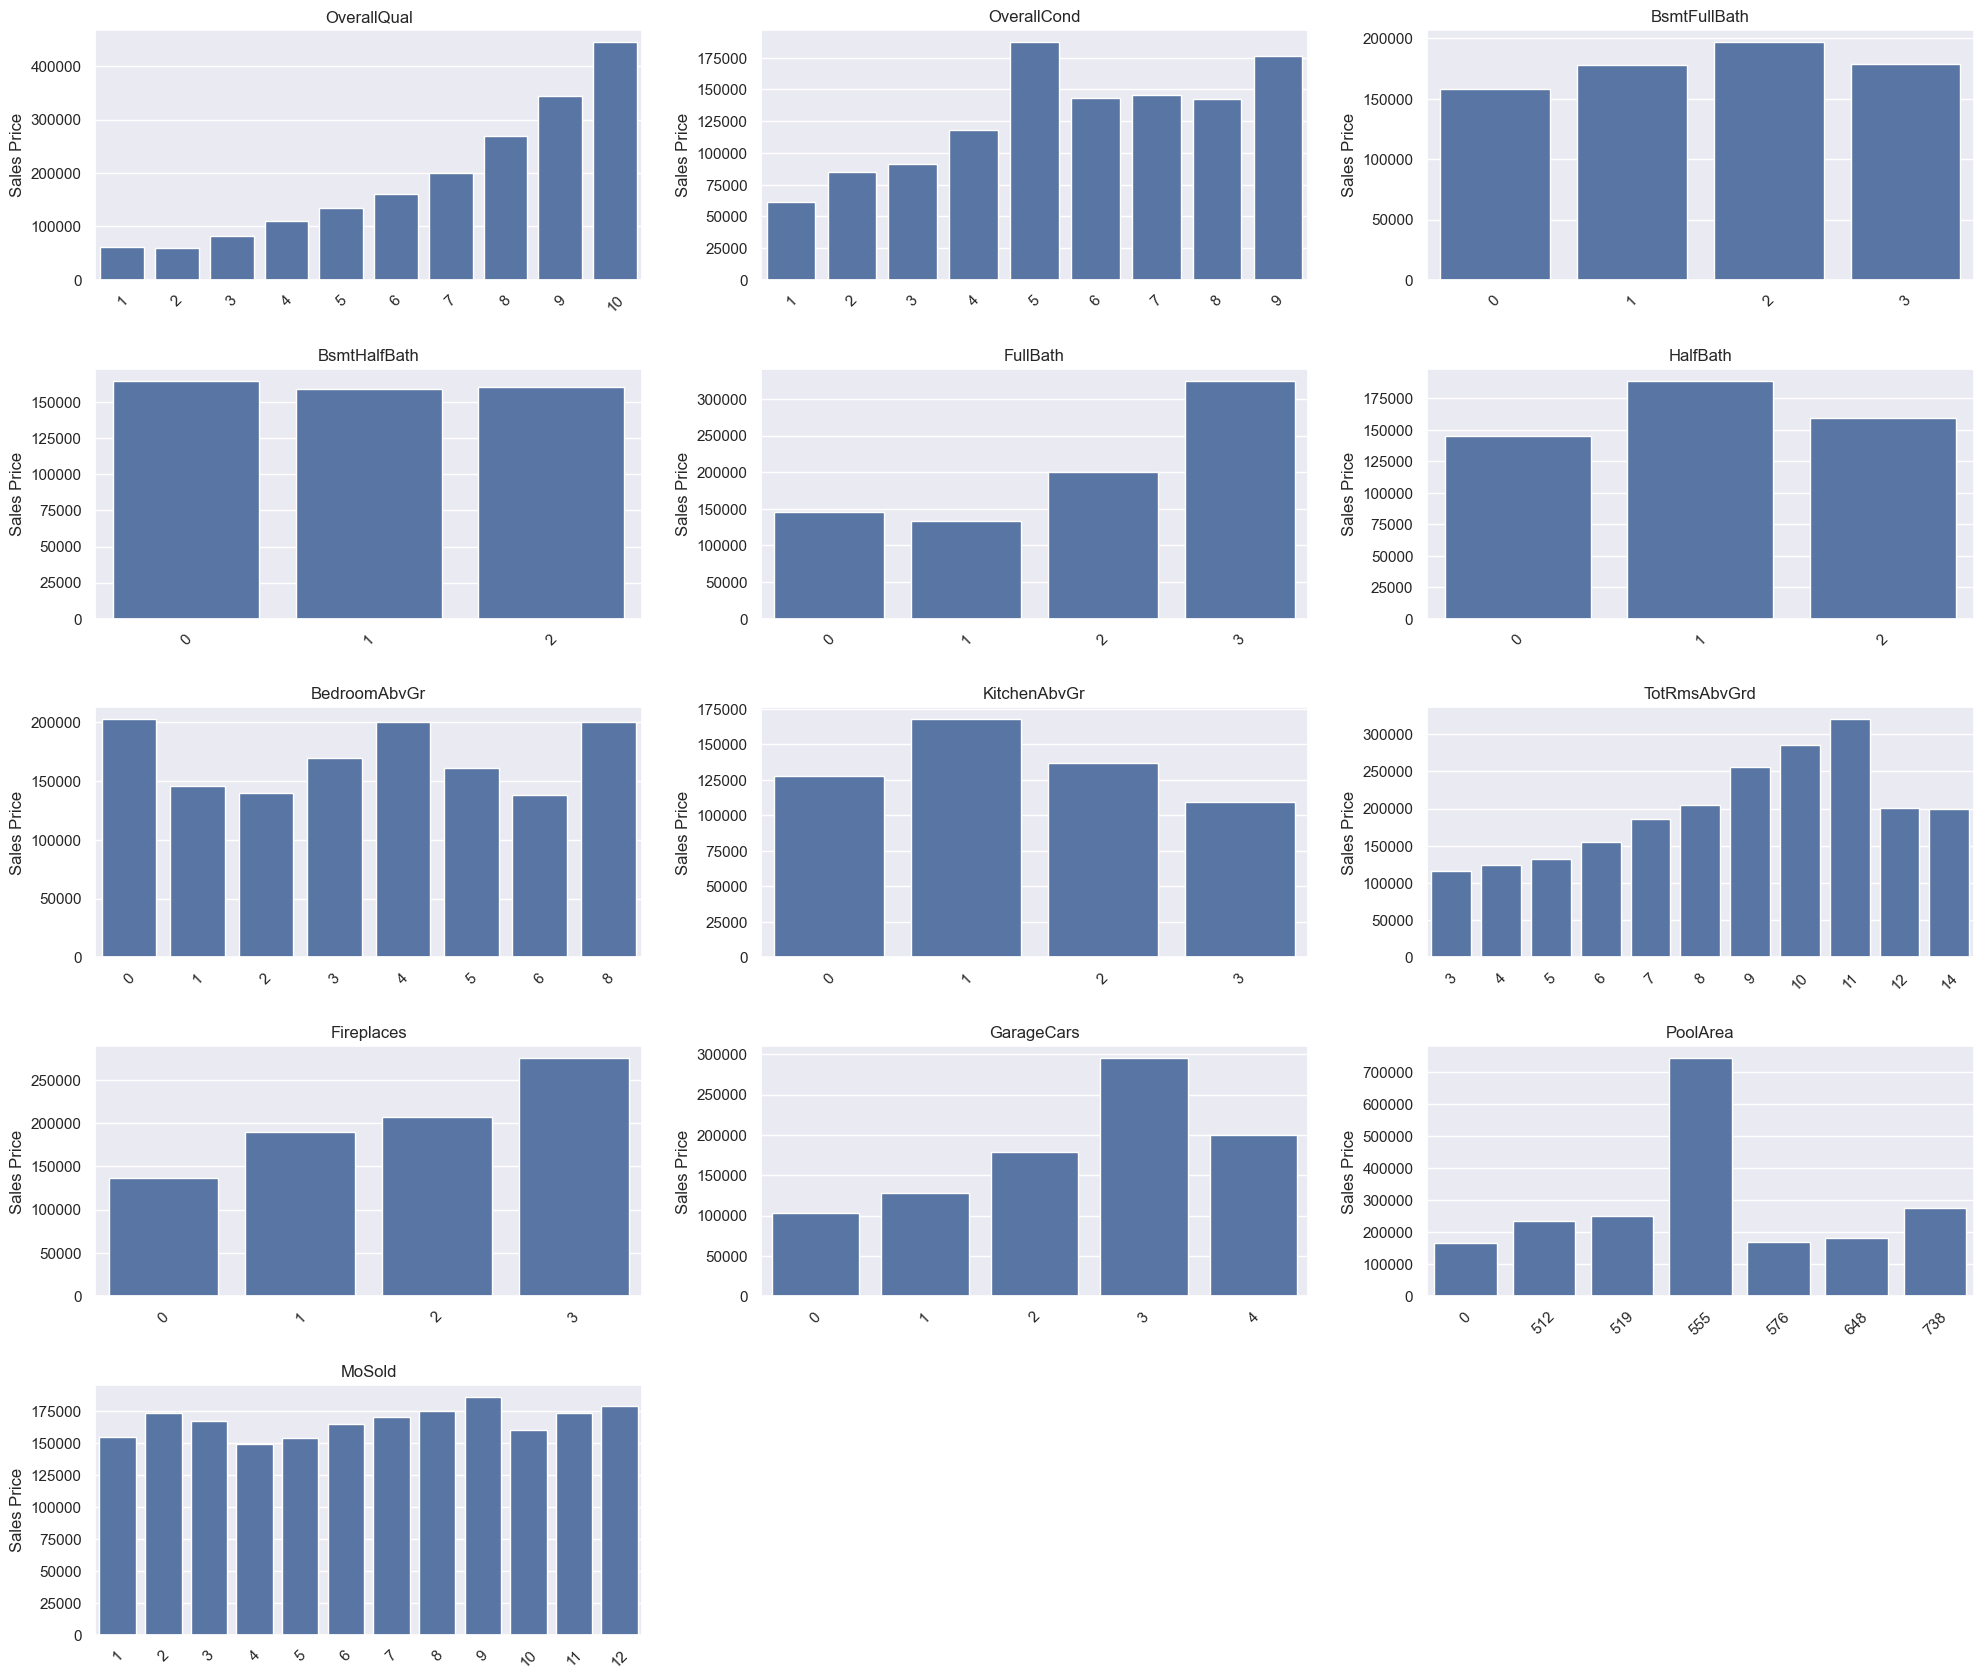

In [96]:
# Use the already loaded train_filtered dataframe
plt.figure(figsize=(20, 20))
for i, feature in enumerate(discrete_features, 1):
    plt.subplot(6, 3, i)
    data = train_filtered.copy()
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("Sales Price", rotation=90)
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

## Fit Models

### Multiple Linear Regression

In [100]:
# impots 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [101]:

# features for MLR
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
 
X = train_log[selected_features]
y = train_log['SalePrice']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Fit linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict and evaluate
y_pred = lm.predict(X_test) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Model equation (logic)
print("\nMLR Equation:")
print("SalePrice = β0 + β1*OverallQual + β2*GrLivArea + β3*GarageCars + β4*TotalBsmtSF + ε")

RMSE: 0.14666774324470463
R2 Score: 0.8730682795276465

MLR Equation:
SalePrice = β0 + β1*OverallQual + β2*GrLivArea + β3*GarageCars + β4*TotalBsmtSF + ε


In [103]:
intercept = lm.intercept_
coefficients = lm.coef_
print("\nMLR Equation:")
print(f"SalePrice = {intercept:.4f} "
      f"+ {coefficients[0]:.4f}*OverallQual "
      f"+ {coefficients[1]:.4f}*GrLivArea "
      f"+ {coefficients[2]:.4f}*GarageCars "
      f"+ {coefficients[3]:.4f}*TotalBsmtSF "
      f"+ ε")


MLR Equation:
SalePrice = 12.0212 + 0.1614*OverallQual + 0.1208*GrLivArea + 0.0803*GarageCars + 0.0867*TotalBsmtSF + ε


#### Residuals

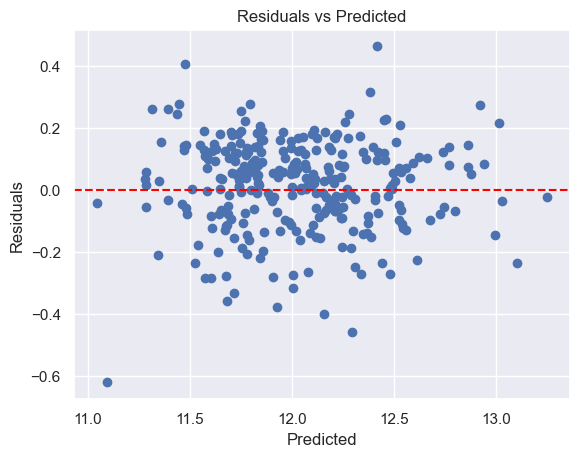

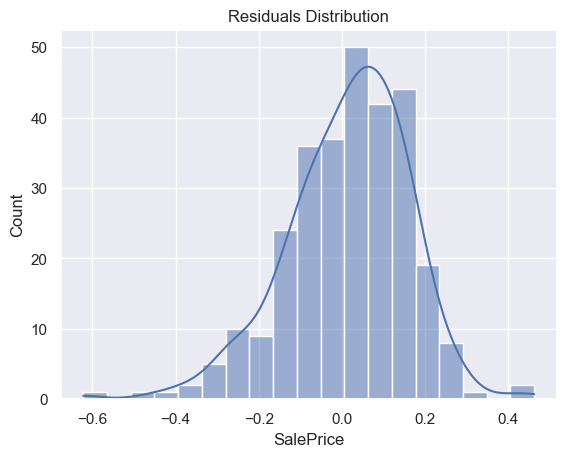

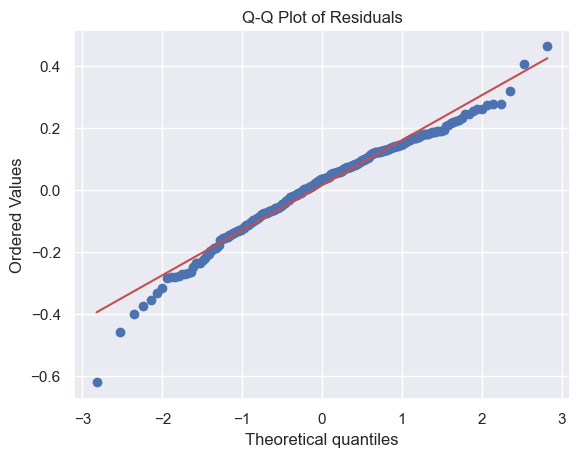

In [105]:
import scipy.stats as stats

residuals = y_test - y_pred

# Residuals vs Fitted
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


#### Multicollinearity Check (VIF)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = sm.add_constant(X)  # Add intercept
vif = pd.DataFrame()
vif["Feature"] = ['Intercept'] + selected_features
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF values:")
print(vif)



VIF values:
       Feature        VIF
0    Intercept  21.075941
1  OverallQual   2.122960
2    GrLivArea   1.605156
3   GarageCars   1.670124
4  TotalBsmtSF   1.477056


VIF results show that all selected features have VIF values well below 5,  indicating low multicollinearity.   

#### Actual vs Predicted Plot
Visualize how well the model predicts: 


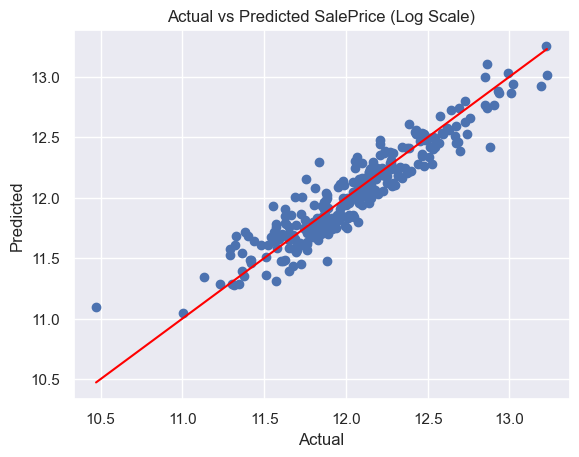

In [108]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted SalePrice (Log Scale)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')   
plt.show()


---

## Make Predictions for Test Set

In [125]:
# load the test dataset
test = pd.read_csv('test.csv')

# Define selected features (same as model)
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

# Drop rows with missing selected features
test_clean = test.dropna(subset=selected_features) 
X_final_test = test_clean[selected_features]
test_ids = test_clean['Id']

# Standardize using scaler from training data 
X_final_scaled = scaler.transform(X_final_test)

# Predict log SalePrice 
y_final_log_pred = lm.predict(X_final_scaled)

#  Inverse log transform to get original SalePrice
y_final_pred = np.exp(y_final_log_pred)

# Step 8: Prepare submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_final_pred
})

# Save as submission.csv
submission.to_csv('submission.csv', index=False)
print("Submission file saved")


Submission file saved


In [126]:
import joblib

# Bundle model and scaler
model_bundle = {
    'model': lm,
    'scaler': scaler
}
 
joblib.dump(model_bundle, 'mlr_bundle.pkl')
print("Model and scaler saved")


Model and scaler saved
